In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [245]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
                 'header': 8}

In [246]:
df = pd.read_csv('../input/ICEFacilityListReport.csv.gz', **read_csv_opts)

In [247]:
df.head()

,DETLOC,Name,Address,City,County,State,Zip,Circuit,AOR,Docket,...,DSM Assigned?,DSM Assignment Type,FY18 Calendar Days in Use,FY18 Possible Days,FY18 % of Days in Use,FY18 Total Mandays,FY17 Calendar Days in Use,FY17 % of Days in Use,FY17 Total Mandays,FY17 Max Pop Count
0,ABRDNWA,ABERDEEN CITY JAIL,210 EAST MARKET ST,ABERDEEN,GRAYS HARBOR,WA,98520,9,SEA,SEA,...,No,NaN,0,400,0%,0,0,0%,0,0
1,ABTHOLD,ABILENE HOLD ROOM,12071 FM 3522,ABILENE,ABILENE,TX,79601,5,DAL,ABT,...,No,NaN,0,400,0%,0,0,0%,0,0
2,ABRXSPA,ABRAXAS ACADEMY DETENTION CENTER,1000 ACADEMY DRIVE,MORGANTOWN,BERKS,PA,19543,3,PHI,BRK,...,No,NaN,35,400,9%,800,372,102%,"1,207",5
3,RICRANS,"ACI (CRANSTON, RHODE ISLAND)",39 HOWARD AVE,CRANSTON,PROVIDENCE,RI,02920,1,BOS,BOS,...,No,NaN,0,400,0%,0,0,0%,0,0
4,ADACOID,ADA COUNTY JAIL,7210 BARRISTER DRIVE,BOISE,ADA,ID,83704,9,SLC,HEL,...,No,NaN,0,400,0%,0,0,0%,0,0


In [248]:
df.columns

Index(['DETLOC', 'Name', 'Address', 'City', 'County', 'State', 'Zip',
       'Circuit', 'AOR', 'Docket',
       ...
       'DSM Assigned?', 'DSM Assignment Type', 'FY18 Calendar Days in Use',
       'FY18 Possible Days', 'FY18 % of Days in Use', 'FY18 Total Mandays',
       'FY17 Calendar Days in Use', 'FY17 % of Days in Use',
       'FY17 Total Mandays', 'FY17 Max Pop Count'],
      dtype='object', length=135)

In [249]:
levels_to_clean = ['ADP - Monthly',
          'ADP: Criminality',
          'ADP: Fiscal Year',
          'ADP: Initial Bookins',
          'Capacity',
          'FY18 ADP: Criminality and Gender',
          'FY18 ADP: Detainee Classification Level',
          'FY18 ADP: ICE Threat Level',
          'FY18 ADP: Mandatory Detention',
          'Facility Average Length of Stay',
          'Facility Bookins',
          'Facility Information',
          'Facility Statistics - FY 2017',
          'Facility Statistics - FY 2018',
          'Initial Bookins',
          'Population']

In [250]:
# # Need to check this doesn't cause issues, make smarter
# for level in levels_to_clean:
#     for col in df.loc[:, level]:
#         try:
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].astype(str)
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace(',','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace('$','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].str.replace('%','')
#             df.loc[:, (level, col)] = df.loc[:, (level, col)].astype(int)
#         except ValueError:
#             pass

for col in df.columns:
    try:
        df.loc[:, col] = df.loc[:, col].astype(str)
        df.loc[:, col] = df.loc[:, col].str.replace(',','')
        df.loc[:, col] = df.loc[:, col].str.replace('$','')
        df.loc[:, col] = df.loc[:, col].str.replace('%','')
        df.loc[:, col] = df.loc[:, col].astype(int)
    except ValueError:
        pass

In [251]:
# adp = []

# for col in df.columns: adp.append('ADP' in col)

In [252]:
alos = ['FY18 ALOS',
        'FY17 ALOS',
        'FY16 ALOS',
        'FY15 ALOS']

adp = ['FY18 ADP',
       'FY17 ADP',
       'FY16 ADP',
       'FY15 ADP']

In [253]:
df.loc[:,alos] = df.loc[:,alos].astype(float)

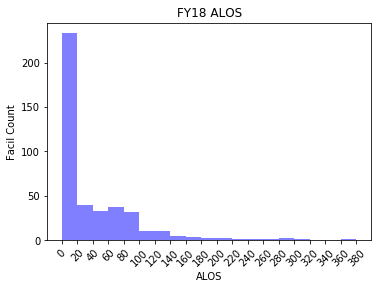

In [254]:
num_bins = np.arange(0,400,20)
data = df['FY18 ALOS']
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
 
plt.plot()
plt.xlabel('ALOS')
plt.xticks(np.arange(0, 400, step=20), rotation=45)
plt.ylabel('Facil Count')
# plt.yticks(np.arange(0, 300, step=50))
# plt.ylim(-5, 275)
plt.title('FY18 ALOS')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15) 
# plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.show()

In [255]:
df['FY18 ALOS'].min()

0.0

In [256]:
df['FY18 ALOS'].max()

400.0

In [257]:
alos.reverse()

In [258]:
adp.reverse()

In [259]:
target_facil = 'CSCNWWA'
target_facil_2 = 'ADLNTCA'

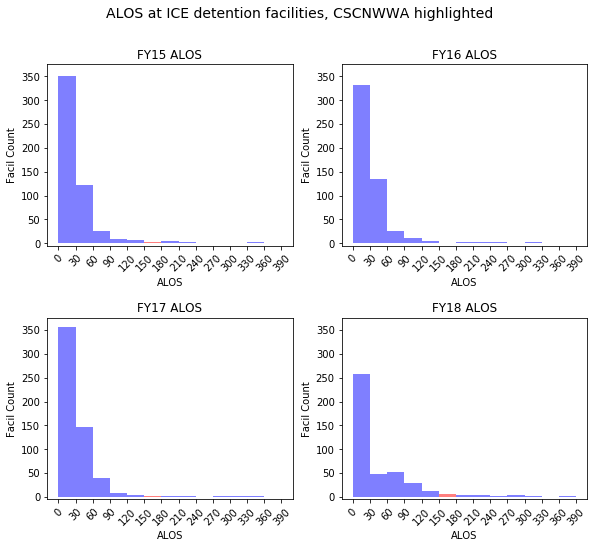

In [260]:
bin_min = 0
bin_max = 400
step = 30

num_bins = np.arange(bin_min, bin_max, step)

target_alos = df.set_index('DETLOC').loc[target_facil, alos]

target_bins = np.digitize(list(target_alos.values), list(bins))

fig = plt.figure(figsize=(10,8))
i = 0
for fy in alos:
    ax=plt.subplot(2,2,i+1)
    
    data = df.set_index('DETLOC')[fy]
    
    n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
    
    patches[target_bins[i]].set_fc('r')
 
    plt.xlabel('ALOS')
    plt.xticks(np.arange(bin_min, bin_max, step=step), rotation=45)
    plt.ylabel('Facil Count')
    plt.yticks(np.arange(0, 400, step=50))
    plt.ylim(-5, 375)
    plt.title(f'{fy}')

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15) 
    i = i + 1
    # plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.suptitle(f'ALOS at ICE detention facilities, {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.show()

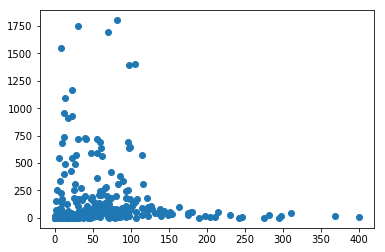

In [261]:
plt.scatter(x='FY18 ALOS', y='FY18 ADP', data=df)

In [262]:
fys = ['FY15',
       'FY16',
       'FY17',
       'FY18']

In [263]:
# Exclude outliers (definitely a better way to do this)
data = df[df.loc[:,'FY15 ALOS'] < 500]
data = data[data.loc[:,'FY16 ALOS'] < 500]
data = data[data.loc[:,'FY17 ALOS'] < 500]
data = data[data.loc[:,'FY18 ALOS'] < 500]

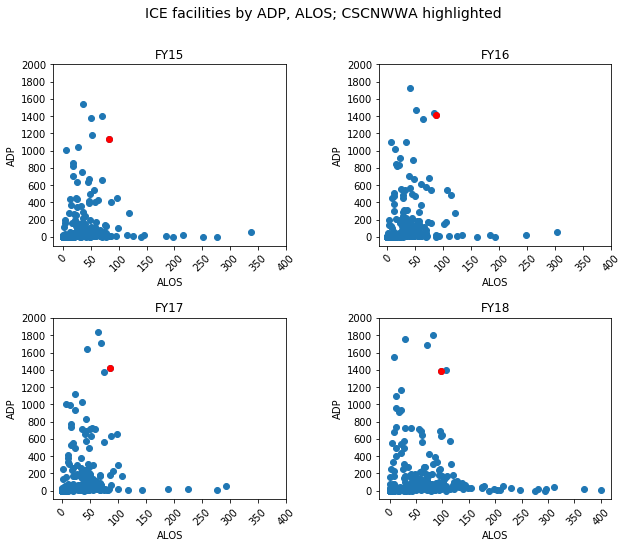

In [264]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    adp_col = f'{fy} ADP'
    alos_col = f'{fy} ALOS'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=alos_col, y=adp_col, data=data)
    plt.scatter(x=alos_col, y=adp_col, c='r', data=data.set_index('DETLOC').loc[target_facil])
    
    plt.xlabel('ALOS')
    plt.xticks(np.arange(0, 450, step=50), rotation=45)
    plt.ylabel('ADP')
    plt.yticks(np.arange(0, 2001, step=200))
    plt.ylim(-100, 2000)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by ADP, ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

In [265]:
solitary = pd.read_csv('../input/solitary_stats.csv', sep='|')

In [266]:
solitary = solitary.set_index('Unnamed: 0')

In [267]:
solitary.index.name = 'DETLOC'

In [268]:
sol_cols = list(solitary.columns)

In [269]:
solitary = solitary.dropna(how='all', axis=0)

In [270]:
sol_index = list(solitary.index)

In [271]:
data = data.set_index('DETLOC').join(solitary)

In [272]:
data = data.loc[sol_index]

/Users/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [273]:
fys = [
       'FY16',
       'FY17',
       'FY18']

In [274]:
data[sol_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, ADLNTCA to YUBAJCA
Data columns (total 7 columns):
FY16 solitary ALOS     60 non-null float64
FY17 solitary ALOS     70 non-null float64
FY18 solitary ALOS     64 non-null float64
FY16 solitary count    84 non-null float64
FY17 solitary count    84 non-null float64
FY18 solitary count    84 non-null float64
FY17_solitary_ADP      84 non-null float64
dtypes: float64(7)
memory usage: 5.5+ KB


In [275]:
data.loc[:,sol_cols] = data.loc[:,sol_cols].fillna(0)

In [276]:
data.loc[:,adp] = data.loc[:,adp].fillna(0)
data.loc[:,alos] = data.loc[:,alos].fillna(0)

In [277]:
np.log(data.loc[:,alos])

/Users/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,FY15 ALOS,FY16 ALOS,FY17 ALOS,FY18 ALOS
DETLOC,,,,
ADLNTCA,3.951244,3.931826,4.262680,4.248495
ATLANGA,2.397895,3.401197,3.555348,3.555348
BAKERFL,4.077537,3.970292,3.891820,4.204693
BERGENJ,4.595120,4.615121,4.521789,4.488636
BOONEKY,3.610918,3.663562,3.610918,4.060443
BOPHON,3.988984,3.931826,3.761200,1.386294
BRINDMA,4.204693,4.174387,4.234107,4.795791
BTV,4.143135,4.343805,4.330733,4.744932
BUTLEKS,2.995732,2.833213,3.367296,2.772589


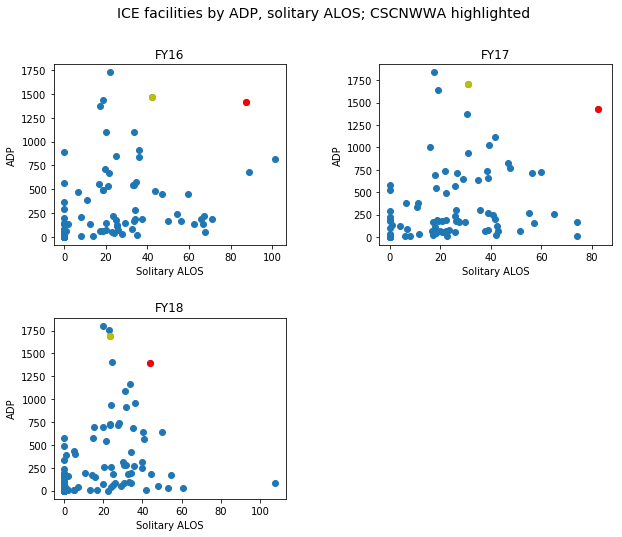

In [278]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    x = f'{fy} solitary ALOS'
    y = f'{fy} ADP'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=x, y=y, data=data)
    plt.scatter(x=x, y=y, c='r', data=data.loc[target_facil])
    plt.scatter(x=x, y=y, c='y', data=data.loc[target_facil_2])
    
    plt.xlabel('Solitary ALOS')
#     plt.xticks(np.arange(0, 126, step=25), rotation=45)
    plt.ylabel('ADP')
#     plt.yticks(np.arange(0, 2001, step=200))
#     plt.ylim(-100, 2000)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by ADP, solitary ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

In [279]:
# data.loc[:,sol_cols] = np.log(data.loc[:,sol_cols]+1)

In [280]:
# data.loc[:,alos] = np.log(data.loc[:,alos]+1)

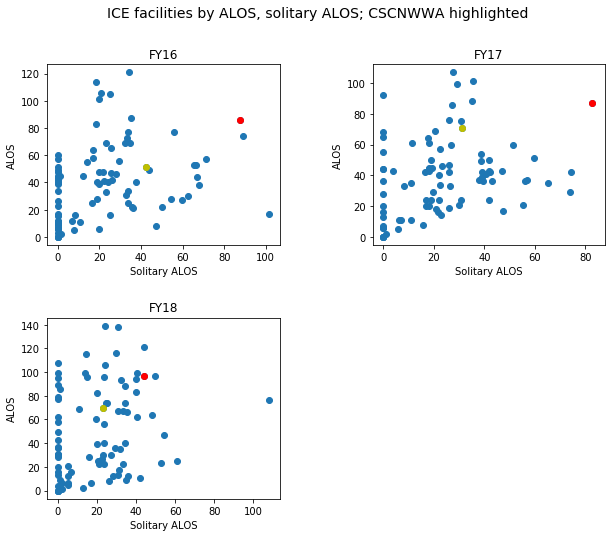

In [281]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    x = f'{fy} solitary ALOS'
    y = f'{fy} ALOS'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=x, y=y, data=data)
    plt.scatter(x=x, y=y, c='r', data=data.loc[target_facil])
    plt.scatter(x=x, y=y, c='y', data=data.loc[target_facil_2])
    
    plt.xlabel('Solitary ALOS')
#     plt.xticks(np.arange(0, 126, step=25), rotation=45)
    plt.ylabel('ALOS')
#     plt.yticks(np.arange(0, 151, step=10))
#     plt.ylim(-5, 150)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by ALOS, solitary ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

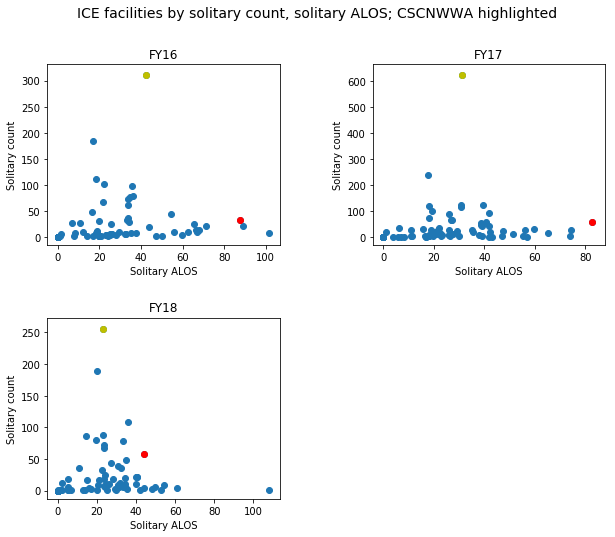

In [282]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in fys:
    x = f'{fy} solitary ALOS'
    y = f'{fy} solitary count'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=x, y=y, data=data)
    plt.scatter(x=x, y=y, c='r', data=data.loc[target_facil])
    plt.scatter(x=x, y=y, c='y', data=data.loc[target_facil_2])
    
    plt.xlabel('Solitary ALOS')
#     plt.xticks(np.arange(0, 126, step=25), rotation=45)
    plt.ylabel('Solitary count')
#     plt.yticks(np.arange(0, 151, step=10))
#     plt.ylim(-5, 150)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by solitary count, solitary ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;

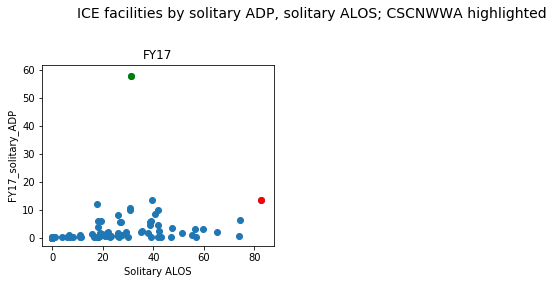

In [285]:
fig = plt.figure(figsize=(10,8))
i = 0
for fy in ['FY17']:
    x = f'{fy} solitary ALOS'
    y = f'FY17_solitary_ADP'
    ax=plt.subplot(2,2,i+1)
    i = i+1
    
    plt.scatter(x=x, y=y, data=data)
    plt.scatter(x=x, y=y, c='r', data=data.loc[target_facil])
    plt.scatter(x=x, y=y, c='g', data=data.loc[target_facil_2])
    
    plt.xlabel('Solitary ALOS')
#     plt.xticks(np.arange(0, 100, step=10), rotation=45)
    plt.ylabel('FY17_solitary_ADP')
#     plt.yticks(np.arange(0, 100, step=10))
#     plt.ylim(-5, 70)
    plt.title(f'{fy}')

plt.suptitle(f'ICE facilities by solitary ADP, solitary ALOS; {target_facil} highlighted', fontsize=14)
plt.subplots_adjust(wspace=.4, hspace=.4)
plt.show;